Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random

Getting training and testing data

In [2]:
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")

Labeling the character ids

In [3]:
le = LabelEncoder()

train_X = Train.drop(columns=['Char_ID'])
train_labels = le.fit_transform(Train['Char_ID'])

test_X = Test.drop(columns=['Char_ID'])
test_labels = le.fit_transform(Test['Char_ID'])

Normalising the data

In [4]:
train_X = np.array(train_X) / 255.0
train_labels = np.array(train_labels)

test_X = np.array(test_X) / 255.0
test_labels = np.array(test_labels)

In [5]:
train_images = []
test_images = []

for i in range(len(train_X)):
    train_images.append(train_X[i].reshape(32, 32, 1))

for i in range(len(test_X)):
    test_images.append(test_X[i].reshape(32, 32, 1))

train_images = np.array(train_images)
test_images = np.array(test_images)

Deleting unneccessory variables

In [6]:
del(Train, Test, train_X, test_X)

Deviding data into train, test and validation

In [7]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15)

Making our Neural Network

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46))

Compiling and training model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
2078/2078 [==============================] - 28s 5ms/step - loss: 0.6253 - accuracy: 0.8213 - val_loss: 0.2054 - val_accuracy: 0.9396
Epoch 2/20
2078/2078 [==============================] - 11s 5ms/step - loss: 0.1603 - accuracy: 0.9502 - val_loss: 0.1795 - val_accuracy: 0.9463
Epoch 3/20
2078/2078 [==============================] - 11s 5ms/step - loss: 0.1052 - accuracy: 0.9669 - val_loss: 0.1361 - val_accuracy: 0.9600
Epoch 4/20
2078/2078 [==============================] - 12s 6ms/step - loss: 0.0764 - accuracy: 0.9753 - val_loss: 0.1315 - val_accuracy: 0.9636
Epoch 5/20
2078/2078 [==============================] - 12s 6ms/step - loss: 0.0584 - accuracy: 0.9816 - val_loss: 0.1083 - val_accuracy: 0.9693
Epoch 6/20
2078/2078 [==============================] - 11s 5ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.1072 - val_accuracy: 0.9710
Epoch 7/20
2078/2078 [==============================] - 11s 5ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.1244 - val_ac

Plotting learning curves

432/432 - 1s - loss: 0.1337 - accuracy: 0.9782


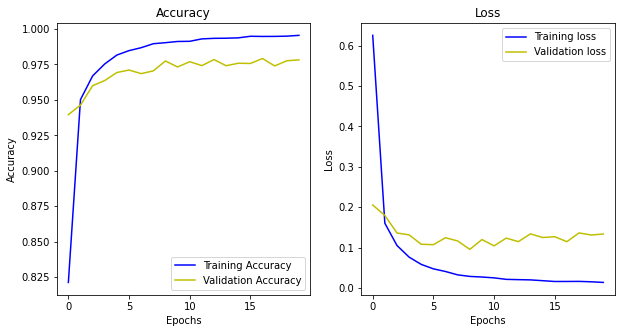

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.epoch, history.history['accuracy'], color='b', label="Training Accuracy")
plt.plot(history.epoch, history.history['val_accuracy'], color='y', label="Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.epoch, history.history['loss'], color='b', label="Training loss")
plt.plot(history.epoch, history.history['val_loss'], color='y', label="Validation loss")
plt.legend()

plt.show()

Character class

In [12]:
class_names = ['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण',
               'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष',
               'स', 'ह', 'क्ष', 'त्र', 'ज्ञ', '०', '१', '२', '३', '४', '५' , '६', '७', '८', '९']

Loading Devanagari fonts

In [13]:
font_path = "D:\Gotu\Gotu-Regular.ttf"
prop = mfm.FontProperties(fname=font_path)

Validating model on unseen data

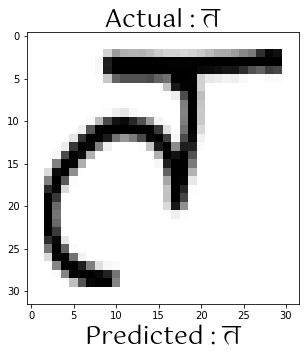

In [14]:
t = random.randint(0, len(val_images))

image = val_images[t]
label = val_labels[t]

p = model.predict(np.array([image]))

temp = image.reshape((32, 32))
plt.figure(figsize=(5, 5))
plt.title(f'Actual : {class_names[val_labels[t]]}', fontproperties=prop, size=25)
plt.xlabel(f'Predicted : {class_names[np.argmax(p)]}', fontproperties=prop, size=25)
plt.imshow(temp, cmap=plt.cm.binary)
plt.show()

In [15]:
model.save("handwritten_devanagari_script_recognition2.h5")